## Importing Modules

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
import warnings
%matplotlib inline
warnings.filterwarnings("ignore")

## Reading the dataset

In [7]:
data = pd.read_csv("Twitter sentiments.csv")
data.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


## Data Preprocessing

In [12]:
#removing the patterns in the input text
def remove_pattern(input_text, pattern):
    r = re.findall(pattern, input_text)
    for word in r:
        input_text = re.sub(word,"",input_text)
    return input_text

In [13]:
#removing the twitter handles (@user)
data["clean_tweet"] = np.vectorize(remove_pattern)(data['tweet'],"@[\w]*")

In [14]:
data.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


In [15]:
#reomving special characters numbers and punctuations
data["clean_tweet"] = data["clean_tweet"].str.replace("[^a-zA-Z#]"," ")
data.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide society now #motivation


In [16]:
#removing short words like "is in " etc..
data["clean_tweet"] = data["clean_tweet"].apply(lambda x:" ".join([w for w in x.split() if len(w)>3]))
data.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model love take with time
4,5,0,factsguide: society now #motivation,factsguide society #motivation


In [17]:
#splitting the tweets into tokens
tweet_tokens = data['clean_tweet'].apply(lambda x: x.split())
tweet_tokens.head()

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, cause, they, offer, wh...
2                              [bihday, your, majesty]
3                     [#model, love, take, with, time]
4                   [factsguide, society, #motivation]
Name: clean_tweet, dtype: object

In [18]:
#stemming the words
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()
tweet_tokens = tweet_tokens.apply(lambda sentence: [stemmer.stem(word) for word in sentence])
tweet_tokens.head()

0    [when, father, dysfunct, selfish, drag, kid, i...
1    [thank, #lyft, credit, caus, they, offer, whee...
2                              [bihday, your, majesti]
3                     [#model, love, take, with, time]
4                         [factsguid, societi, #motiv]
Name: clean_tweet, dtype: object

In [19]:
#combining tokens into sentences
for i in range(len(tweet_tokens)):
    tweet_tokens[i]=" ".join(tweet_tokens[i])
data["clean_tweet"] = tweet_tokens
data.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunct selfish drag kid into dys...
1,2,0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit caus they offer wheelchair ...
2,3,0,bihday your majesty,bihday your majesti
3,4,0,#model i love u take with u all the time in ...,#model love take with time
4,5,0,factsguide: society now #motivation,factsguid societi #motiv


## Exploratory Data Analysis

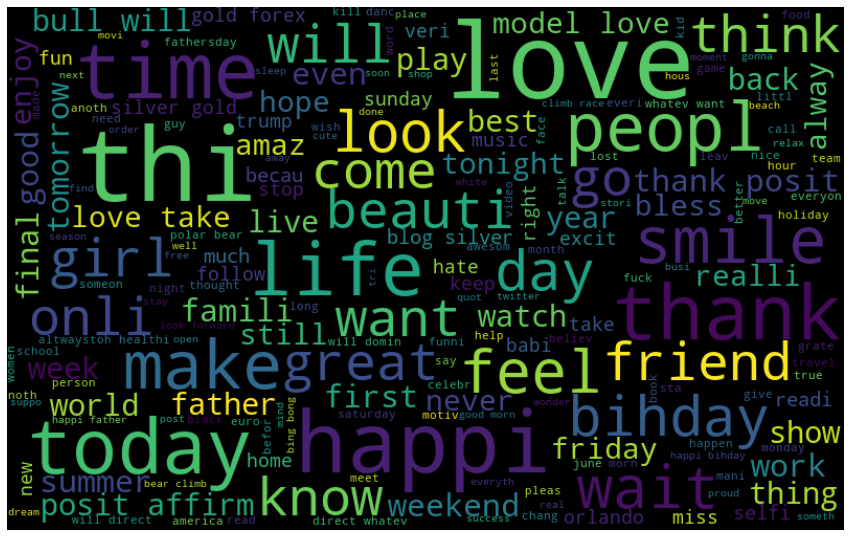

In [21]:
#visualising the frequent words
#!pip install wordcloud
all_words = " ".join([sentence for sentence in data["clean_tweet"]])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

#plotting the graph
plt.figure(figsize=(15,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

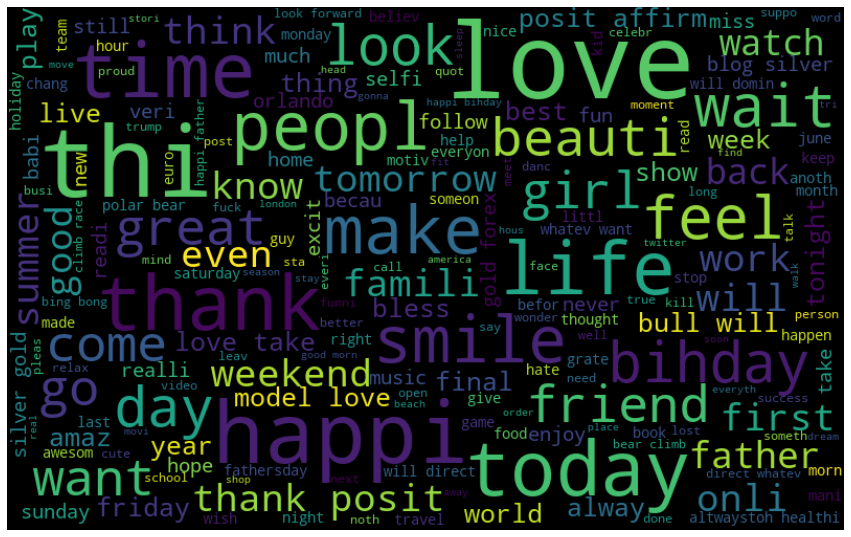

In [23]:
#visualising the frequent +ve words
all_words = " ".join([sentence for sentence in data["clean_tweet"][data["label"]==0]])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

#plotting the graph
plt.figure(figsize=(15,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

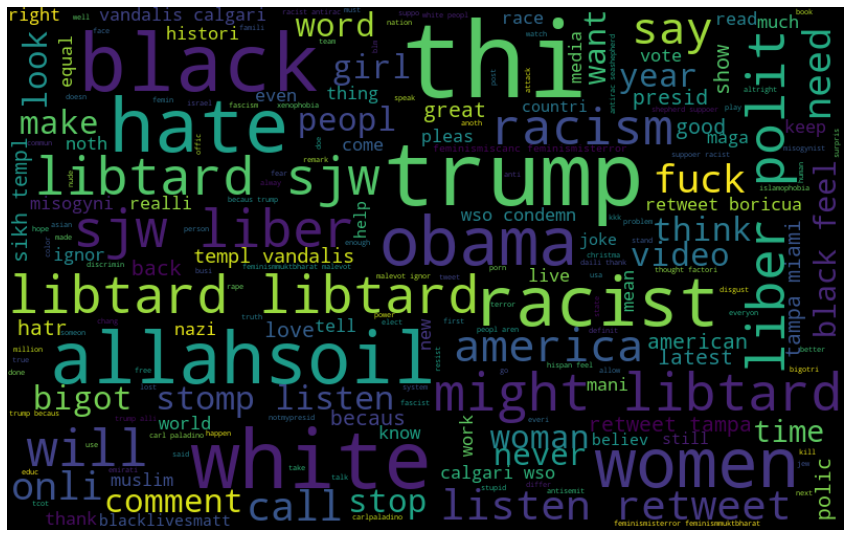

In [24]:
#visualising the frequent -ve words
all_words = " ".join([sentence for sentence in data["clean_tweet"][data["label"]==1]])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

#plotting the graph
plt.figure(figsize=(15,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

In [26]:
#extracting the hashtags
def extract_hashtags(tweets):
    hashtags=[]
    for tweet in tweets:
        htg = re.findall(r"#(\w+)", tweet)
        hashtags.append(htg)
    return hashtags
                         
    

In [30]:
#extracting non-racist/sexist tweets
htg_positive = extract_hashtags(data["clean_tweet"][data["label"]==0])

#extracting racist/sexist tweets
htg_negative = extract_hashtags(data["clean_tweet"][data["label"]==1])

In [32]:
htg_positive[:5]

[['run'], ['lyft', 'disapoint', 'getthank'], [], ['model'], ['motiv']]

In [33]:
htg_negative[:5]

[['cnn', 'michigan', 'tcot'],
 ['australia',
  'opkillingbay',
  'seashepherd',
  'helpcovedolphin',
  'thecov',
  'helpcovedolphin'],
 [],
 [],
 ['neverump', 'xenophobia']]

In [34]:
#un-nesting list
htg_positive = sum(htg_positive, [])
htg_negative = sum(htg_negative, [])

In [35]:
htg_positive[:5]

['run', 'lyft', 'disapoint', 'getthank', 'model']

In [39]:
freq = nltk.FreqDist(htg_positive)
df = pd.DataFrame({'Hashtag':list(freq.keys()),"Count":list(freq.values())})
df.head()

,Hashtag,Count
0,run,72
1,lyft,2
2,disapoint,1
3,getthank,2
4,model,375


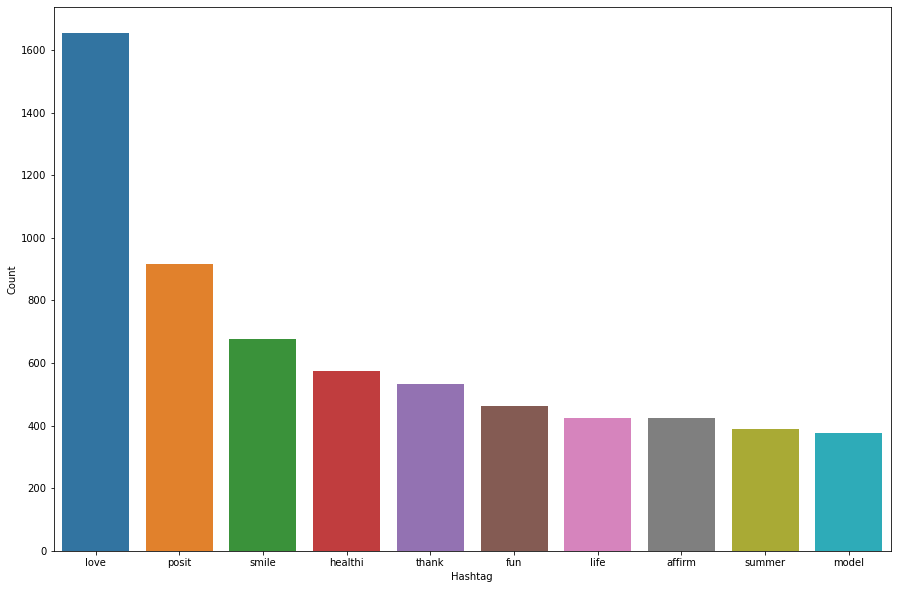

In [41]:
#visualising Top 10 Hashtags
df = df.nlargest(columns='Count',n=10)
plt.figure(figsize=(15,10))
sns.barplot(data=df,x='Hashtag',y='Count')
plt.show()

In [42]:
freq = nltk.FreqDist(htg_negative)
df = pd.DataFrame({'Hashtag':list(freq.keys()),"Count":list(freq.values())})
df.head()

,Hashtag,Count
0,cnn,10
1,michigan,2
2,tcot,14
3,australia,6
4,opkillingbay,5


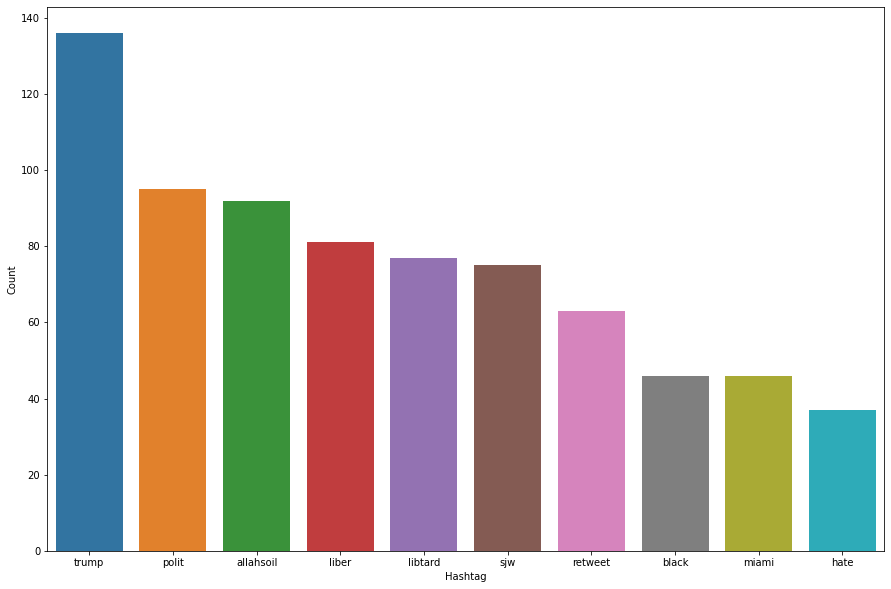

In [43]:
#visualising Top 10 Hashtags
df = df.nlargest(columns='Count',n=10)
plt.figure(figsize=(15,10))
sns.barplot(data=df,x='Hashtag',y='Count')
plt.show()

## Feature Extraction

In [44]:
from sklearn.feature_extraction.text import CountVectorizer
bag_vectorizer = CountVectorizer(max_df=0.9, min_df=2, max_features=1000, stop_words='english')
bag = bag_vectorizer.fit_transform(data["clean_tweet"])



In [46]:
bag[0].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [48]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(bag, data['label'], random_state=42, test_size=0.25)

## Model Training

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score


In [51]:
#training
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [54]:
#testing
y_pred = model.predict(x_test)

In [55]:
f1_score(y_test,y_pred)


0.49763033175355453

In [56]:
accuracy_score(y_test,y_pred)

0.9469403078463271

In [57]:
pred_prob = model.predict_proba(x_test)
pred = pred_prob[:,1]>=0.3
pred=pred.astype(np.int)
f1_score(y_test,pred)

0.5545722713864307

In [58]:
accuracy_score(y_test,pred)

0.9433112251282693